<a href="https://colab.research.google.com/github/GOLISHYAMP/Colab_Notebooks/blob/main/AnomalyDetectionIsolationForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [247]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/healthcare.csv')

In [248]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [249]:
df['stroke'].value_counts()

,count
stroke,
0,4861
1,249


In [250]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [251]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [252]:
df.drop(columns = ['id', 'ever_married', 'work_type'],axis = 1, inplace = True)

In [253]:
df.head()

,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Rural,174.12,24.0,never smoked,1


In [254]:
df = df.dropna()

In [255]:
df.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0
stroke,0


In [256]:
df.stroke.value_counts()

,count
stroke,
0,4700
1,209


In [257]:
df.head()

,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Urban,186.21,29.0,formerly smoked,1


In [258]:
df.drop(['gender','Residence_type','smoking_status','hypertension','heart_disease'],axis = 1, inplace = True)

<ipython-input-258-2f63227468b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['gender','Residence_type','smoking_status','hypertension','heart_disease'],axis = 1, inplace = True)


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4909 non-null   float64
 1   avg_glucose_level  4909 non-null   float64
 2   bmi                4909 non-null   float64
 3   stroke             4909 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 191.8 KB


In [260]:
# df['Residence_type'].unique()

In [261]:
# df['smoking_status'].unique()

In [262]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# df['gender'] = le.fit_transform(df['gender'])

In [263]:
# df['Residence_type'] = le.fit_transform(df['Residence_type'])

In [264]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [265]:
df.columns

Index(['age', 'avg_glucose_level', 'bmi', 'stroke'], dtype='object')

In [266]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Specify numerical and categorical features
numerical_features = ['age', 'avg_glucose_level', 'bmi']
# categorical_features = ['smoking_status']

# Create ColumnTransformer to scale numerical features and one-hot encode categorical features
ct = ColumnTransformer(
    transformers=[
        ('standardScaler', StandardScaler(), numerical_features)  # Standard scaling for numerical columns
        # ('smoke_status_ohe', OneHotEncoder(), categorical_features)  # One-hot encoding for categorical columns
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Fit and transform the data
X_transformed = ct.fit_transform(X)

In [267]:
X_transformed

array([[ 1.07013796,  2.77769839,  0.98134488],
       [ 1.64656262,  0.0138418 ,  0.45926914],
       [ 0.27201152,  1.48413156,  0.70120668],
       ...,
       [-0.34875349, -0.50236926,  0.21733161],
       [ 0.36069224,  1.37291993, -0.41934612],
       [ 0.05030973, -0.45081569, -0.34294479]])

In [268]:
list(X_transformed[:1, :])

[array([1.07013796, 2.77769839, 0.98134488])]

Ok the now lets see the correlation matrix

In [269]:
new_X = np.column_stack((X_transformed, y))

Now from these many features lets find the PCA

In [270]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X_transformed)

In [271]:
X

array([[ 2.65088789, -1.63454881],
       [ 1.3153746 ,  0.55238177],
       [ 1.33263164, -0.84628792],
       ...,
       [-0.34298346,  0.46066878],
       [ 0.66809741, -1.29262619],
       [-0.39820421,  0.2194102 ]])

[]

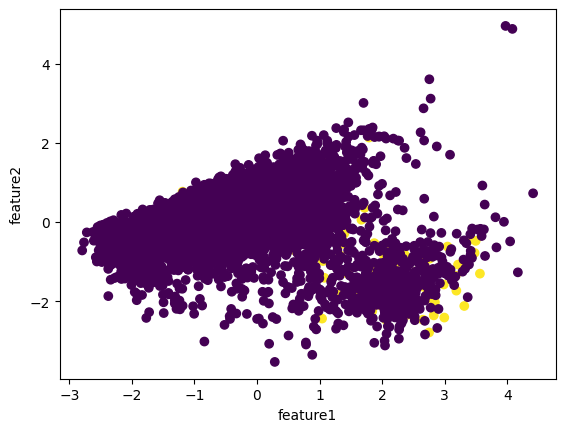

In [273]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.plot()

In [281]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(contamination=0.05)
clf.fit(X)
predict = clf.predict(X)

In [282]:
predict

array([1, 1, 1, ..., 1, 1, 1])

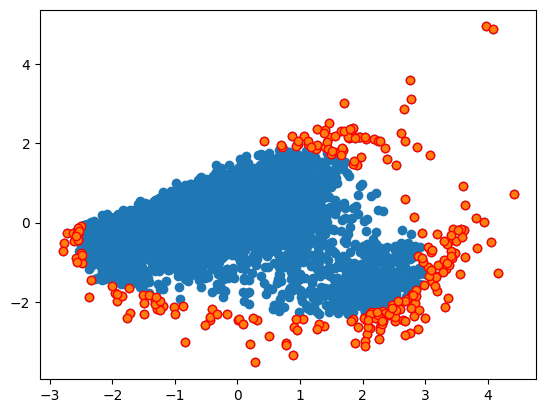

In [283]:
index = np.where(predict < 0)
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X[index, 0], X[index,1], edgecolors = 'r')